In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [29]:
data = pd.read_csv('3.01. Country clusters.csv')
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

### plot the data

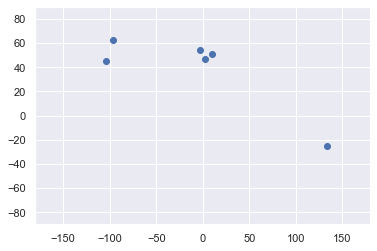

In [30]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### select the features

In [31]:
x = data.iloc[:,1:3] # iloc slices data withjin given boundaries first : indicates rows.w e want all so use :
                     # second : indicates columns, we need lat an d long, which are columns 2 and 3. so use 1:3

In [32]:
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

### clustering

In [33]:
kmeans = KMeans(2)  # value 2 is number of clusters we want

In [34]:
kmeans.fit(x)

KMeans(n_clusters=2)

### clustering results

In [35]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [36]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        1
1     Canada     62.40     -96.80  English        1
2     France     46.75       2.40   French        1
3         UK     54.01      -2.53  English        1
4    Germany     51.15      10.40   German        1
5  Australia    -25.45     133.11  English        0

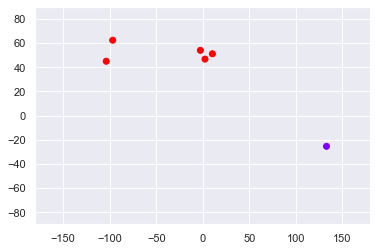

In [37]:
plt.scatter(data['Longitude'],data['Latitude'], c= data_with_clusters['Cluster'],cmap='rainbow') #color by cluster so we can see them 
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [38]:
kmeans = KMeans(3)  # try 3 clusters 
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        1
1     Canada     62.40     -96.80  English        1
2     France     46.75       2.40   French        0
3         UK     54.01      -2.53  English        0
4    Germany     51.15      10.40   German        0
5  Australia    -25.45     133.11  English        2

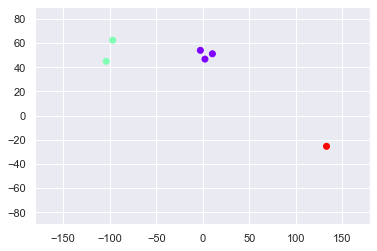

In [39]:
plt.scatter(data['Longitude'],data['Latitude'], c= data_with_clusters['Cluster'],cmap='rainbow') #color by cluster so we can see them 
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# use language column also

In [40]:
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

### Map  the data

In [41]:
data_mapped = data.copy()

In [43]:
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

Country  Latitude  Longitude  Language
0        USA     44.97    -103.77         0
1     Canada     62.40     -96.80         0
2     France     46.75       2.40         1
3         UK     54.01      -2.53         0
4    Germany     51.15      10.40         2
5  Australia    -25.45     133.11         0

### select the features

In [45]:
x = data_mapped.iloc[:,3:4] #keep all rows and last column only
x

Language
0         0
1         0
2         1
3         0
4         2
5         0

### Clustering

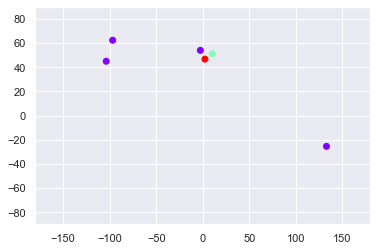

In [46]:
kmeans = KMeans(3)  # try 3 clusters 
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

plt.scatter(data['Longitude'],data['Latitude'], c= data_with_clusters['Cluster'],cmap='rainbow') #color by cluster so we can see them 
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()